<a href="https://colab.research.google.com/github/Mayshro/Hand_Written_Letter_Clss_Project/blob/main/Hand_Written_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries and load the dataset

In [35]:
import tensorflow as tf

In [36]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical 


In [37]:
#the data, split between train and test sets
from keras.datasets import mnist
(train_Xs, train_ys), (test_Xs, test_ys) = mnist.load_data()

print(train_Xs.shape, train_ys.shape)

(60000, 28, 28) (60000,)


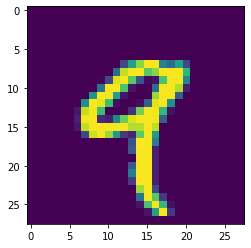

In [38]:
plt.imshow(train_Xs[4])

In [39]:
train_ys.shape

(60000,)

Preprocess the data

In [40]:
from tensorflow.python.ops.gen_array_ops import tensor_scatter_min_eager_fallback
#convert class vectors to binery class matrices
import numpy as np

train_y = keras.utils.to_categorical(train_ys, num_classes=None)
test_y = keras.utils.to_categorical(test_ys, num_classes=None)

train_X = train_Xs.astype('float32')/255
test_X = test_Xs.astype('float32')/255
train_X =np.expand_dims(train_X,-1)
test_X =np.expand_dims(test_X,-1)

print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [41]:
train_y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Create the Model
Create CNN model and compile the model with Adadelta optimizer
```
# This is formatted as code
```



In [42]:
from keras.layers.attention.multi_head_attention import activation
batch_size =128
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(128,(3,3), input_shape=(28,28,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3), input_shape=(28,28,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.25))

# model.add(Dense(256, activation="relu"))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [43]:
model.compile(optimizer = 'adam',loss=keras.losses.categorical_crossentropy,metrics ='accuracy')

Train the model

In [44]:
train_X.shape

(60000, 28, 28, 1)

In [45]:
model.fit(train_X,train_y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1563 - accuracy: 0.9519
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0584 - accuracy: 0.9818
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0430 - accuracy: 0.9865
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0363 - accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0310 - accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0264 - accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0238 - accuracy: 0.9924
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0202 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0195 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.017

Evaluate the model

In [46]:
score = model.evaluate(test_X, test_y)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


313/313 [==============================] - 1s 3ms/step - loss: 0.0303 - accuracy: 0.9913
Test loss: 0.030267121270298958
Test accuracy: 0.9912999868392944


313/313 [==============================] - 1s 3ms/step


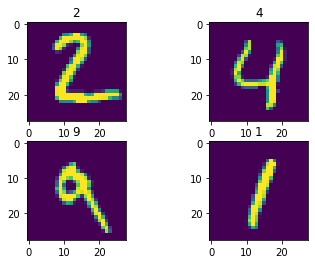

In [64]:
pred = np.argmax(model.predict(test_X),axis=1)
fig,ax = plt.subplots(nrows=2,ncols=2)
test = [1,4,7,5]
for i,ax in zip(test,ax.ravel()) :

  ax.imshow(test_Xs[i])

  ax.set_title(pred[i])